# TME4 : Théorie des sous-ensembles et logique floue

Bouchouchi Nour (28600211)  
Borchani Sofia (21212080)

In [294]:
import matplotlib.pyplot as plt
import numpy as np

## Opération de base

On calcule le degré d'appartenance pour différents points (dont des points intermédiaires) d'un sef quelconque [(1,0), (4,1), (6, 0.6), (7, 0.3), (9, 1), (10, 0.5), (15, 0)].

In [295]:
def deg_app(x, sef):
    """
    x : point
    sef : liste de points d'inflexion du sous-ensemble flou (on la suppose triée)
    """
    if x<= sef[0][0]:
        return sef[0][1]
    i=0
    while i < len(sef)-1 and not(sef[i][0] < x and x <= sef[i+1][0]) :
        i+=1
    
    if i == len(sef)-1 : 
        return sef[-1][1]
    
    x1,y1 = sef[i]
    x2,y2 = sef[i+1]
    a = (y2-y1)/(x2-x1)
    b = y1-a*x1

    return a * x + b
    

In [296]:
sef_quelconque = [(1,0), (4,1), (6, 0.6), (7, 0.3), (9, 1), (10, 0.5), (15, 0)] 

In [297]:
print("deg_app 0.5 : ", deg_app(0.5, sef_quelconque))
print("deg_app 1 : ", deg_app(1, sef_quelconque))
print("deg_app 1,9 : ", deg_app(1.9, sef_quelconque))
print("deg_app 2,5 : ", deg_app(2.5, sef_quelconque))
print("deg_app 4 : ", deg_app(4, sef_quelconque))
print("deg_app 7 : ", deg_app(7, sef_quelconque))
print("deg_app 15 : ", deg_app(15, sef_quelconque))
print("deg_app 16 : ", deg_app(16, sef_quelconque))

deg_app 0.5 :  0
deg_app 1 :  0
deg_app 1,9 :  0.3
deg_app 2,5 :  0.49999999999999994
deg_app 4 :  1.0
deg_app 7 :  0.2999999999999998
deg_app 15 :  0.0
deg_app 16 :  0


In [298]:
def visualise(liste_sef):
    
    m = min(sef[0][0] for sef in liste_sef)
    M = max(sef[-1][0] for sef in liste_sef)


    plt.figure()
    for sef in liste_sef : 
        sef_copy = sef.copy()
        sef_copy.insert(0, (m, sef[0][1]))
        sef_copy.append((M, sef[-1][1]))
        x,y = zip(*sef_copy)
        plt.plot(x, y)
    plt.xlabel("Axe X")  
    plt.ylabel("Axe Y")
      
    return plt

In [299]:
sef_triangulaire = [(1,0), (4,1), (6,0)]
sef_trapezoidal = [(1,0), (4,1), (6,1), (8,0)]
liste_sef = [sef_quelconque, sef_trapezoidal, sef_triangulaire]

<module 'matplotlib.pyplot' from '/usr/lib/python3/dist-packages/matplotlib/pyplot.py'>

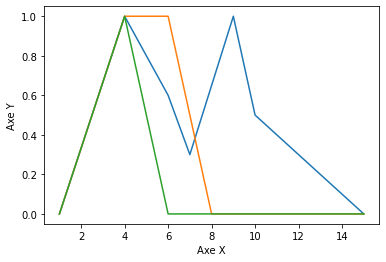

In [300]:
visualise(liste_sef)


## Opération ensemblistes

On construit tout d'abord le complémentaire d'un sef.  
 ∀x ∈ U, fAc (x) = 1 − fA(x)

In [301]:
def complementaire(sef):
    sef_comp = []
    for x,y in sef : 
        sef_comp.append((x, 1-y))
    return sef_comp

<module 'matplotlib.pyplot' from '/usr/lib/python3/dist-packages/matplotlib/pyplot.py'>

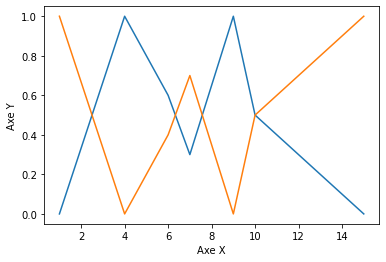

In [302]:
sef_quelconque_comp = complementaire(sef_quelconque)
visualise([sef_quelconque, sef_quelconque_comp])

On définit différentes T_normes et T_conormes et on vérifie qu'elle préserve bien leurs propriétés classiques : commutativité, associativité, monotonie et éléments neutre. 

In [303]:
class T_norme():
    def __init__(self):
        pass
        
    def compute(self, x, y):
        pass

class Probabiliste(T_norme): 
    def __init__(self):
        super().__init__()

    def compute(self, x, y):
        return x * y

class Lukasiewicz(T_norme): 
    def __init__(self):
        super().__init__()

    def compute(self, x, y):
        return max(x + y -1, 0) 

class Zadeh(T_norme):
    def __init__(self):
        super().__init__()

    def compute(self, x, y):
        return min(x,y)

class Produit_Hamacher(T_norme): 
    def __init__(self):
        super().__init__()

    def compute(self, x, y):
        if x==0 and y==0:
            return 0
        else: 
            return (x * y) / (x + y - (x * y) )

class Drastique(T_norme): 
    def __init__(self):
        super().__init__()

    def compute(self, x, y):
        if x == 1: 
            return y
        if y == 1 :
            return x
        return 0

In [304]:
class T_conorme():
    def __init__(self):
        pass

    def compute(self, x, y):
        pass

class Probabiliste_co(T_conorme): 
    def __init__(self):
        super().__init__()

    def compute(self, x, y):
        return x + y - (x * y)
    
class Lukasiewicz_co(T_conorme): 
    def __init__(self):
        super().__init__()

    def compute(self, x, y):
        return min(x + y, 1) 
    
class Zadeh_co(T_conorme): 
    def __init__(self):
        super().__init__()

    def compute(self, x, y):
        return max(x, y)
    
class Produit_Hamacher_co(T_conorme): 
    def __init__(self):
        super().__init__()

    def compute(self, x, y):
        return (x + y) / (1 + x * y)
    
class Drastique_co(T_conorme): 
    def __init__(self):
        super().__init__()

    def compute(self, x, y):
        if x == 0: 
            return y
        if y == 0 :
            return x
        return 1

In [305]:
x = 3
y = 5 
z = 4

zadeh = Zadeh()
print("x=3, y=5, z=4")
print("commutativité : T(x,y)=T(y,x)")
print(zadeh.compute(x,y))
print(zadeh.compute(y,x))

print("associativité : T(x,T(y,z)) = T(T(x,y),z)")

print(zadeh.compute(x, zadeh.compute(y,z)))
print(zadeh.compute(zadeh.compute(x,y), z))

print("monotonie : x<y => T(x,z)<T(y,z)")
print(zadeh.compute(x,z))
print(zadeh.compute(y,z))

print("élément neutre : T(x,1)=x")
print(zadeh.compute(x,1))


x=3, y=5, z=4
commutativité : T(x,y)=T(y,x)
3
3
associativité : T(x,T(y,z)) = T(T(x,y),z)
3
3
monotonie : x<y => T(x,z)<T(y,z)
3
4
élément neutre : T(x,1)=x
1


In [306]:
x = 3
y = 5 
z = 4

zadeh_co = Zadeh_co()
print("x=3, y=5, z=4")
print("commutativité : T(x,y)=T(y,x)")
print(zadeh_co.compute(x,y))
print(zadeh_co.compute(y,x))

print("associativité : T(x,T(y,z)) = T(T(x,y),z)")

print(zadeh_co.compute(x, zadeh_co.compute(y,z)))
print(zadeh_co.compute(zadeh_co.compute(x,y), z))

print("monotonie : x<y => T(x,z)<T(y,z)")
print(zadeh_co.compute(x,z))
print(zadeh_co.compute(y,z))

print("élément neutre : T(x,1)=x")
print(zadeh_co.compute(x,0))


x=3, y=5, z=4
commutativité : T(x,y)=T(y,x)
5
5
associativité : T(x,T(y,z)) = T(T(x,y),z)
5
5
monotonie : x<y => T(x,z)<T(y,z)
4
5
élément neutre : T(x,1)=x
3


On défini ensuite les fonctions d'intersection (t_norme) et d'union (t_conorme). 

In [307]:
def intersection(U_start, U_end,fA, fB, t_norme):
    x = np.linspace(U_start, U_end, 25)
    res = [(xi, t_norme.compute(deg_app(xi, fA), deg_app(xi,fB))) for xi in x]
    return res

In [308]:
def union(U_start, U_end,fA, fB, t_conorme):    
    x = np.linspace(U_start, U_end, 25)
    res = [(xi, t_conorme.compute(deg_app(xi, fA), deg_app(xi,fB))) for xi in x]
    return res

On visualise tout d'abord l'intersection entre deux sef avec les t-normes Zadeh, Lukasiewicz puis Probabiliste : 

In [309]:
def visualise2(liste_liste_sef,titre):
    nb_subplot = len(liste_liste_sef)
    fig, axs = plt.subplots(1, nb_subplot, figsize=(5 * nb_subplot, 4))

    for i in range(nb_subplot):

        m = min(sef[0][0] for sef in liste_liste_sef[i])
        M = max(sef[-1][0] for sef in liste_liste_sef[i])

        for sef in liste_liste_sef[i]:
            sef_copy = sef.copy()
            sef_copy.insert(0, (m, sef[0][1]))
            sef_copy.append((M, sef[-1][1]))
            x, y = zip(*sef_copy)
            axs[i].plot(x, y)
        axs[i].set_xlabel("Axe X")  
        axs[i].set_ylabel("Axe Y")
        axs[i].set_title(titre[i])
    plt.show()


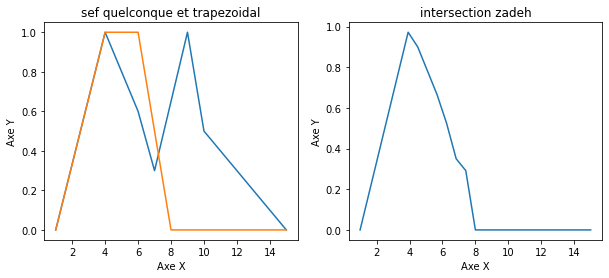

In [310]:
zadeh = Zadeh()
inter = intersection(1, 15, sef_quelconque, sef_trapezoidal, zadeh)
visualise2([[sef_quelconque, sef_trapezoidal], [inter]], ["sef quelconque et trapezoidal", "intersection zadeh"])


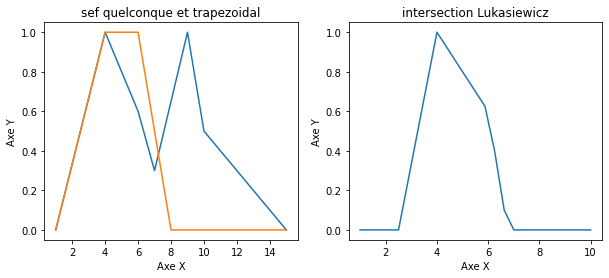

In [311]:
luka = Lukasiewicz()
inter = intersection(1, 10, sef_quelconque, sef_trapezoidal, luka)
visualise2([[sef_quelconque, sef_trapezoidal], [inter]], ["sef quelconque et trapezoidal", "intersection Lukasiewicz"])


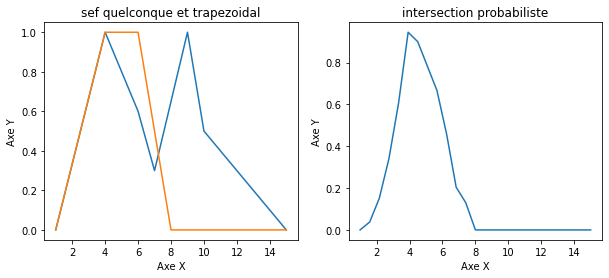

In [312]:
proba = Probabiliste()
inter = intersection(1, 15, sef_quelconque, sef_trapezoidal, proba)
visualise2([[sef_quelconque, sef_trapezoidal], [inter]], ["sef quelconque et trapezoidal", "intersection probabiliste"])


On visualise ensuite l'union entre deux sef avec les T_conormes Zadeh, Probabiliste puis Lukasiewicz  : 

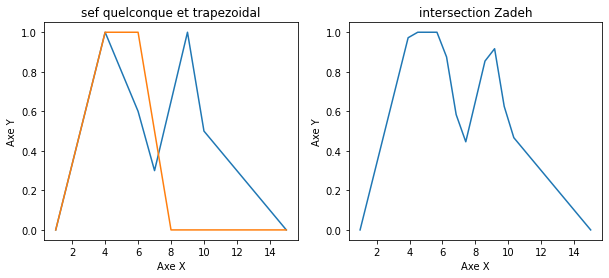

In [313]:
zadeh_co = Zadeh_co()
union_z = union(1, 15, sef_quelconque, sef_trapezoidal, zadeh_co)
visualise2([[sef_quelconque, sef_trapezoidal], [union_z]], ["sef quelconque et trapezoidal", "intersection Zadeh"])


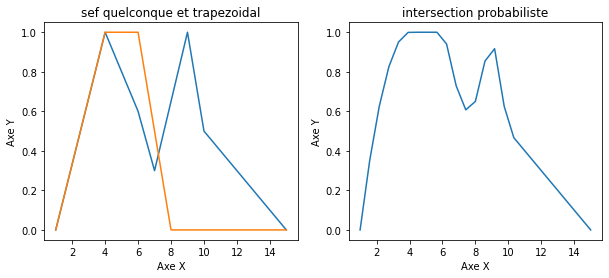

In [314]:
proba_co = Probabiliste_co()
union_p = union(1, 15, sef_quelconque, sef_trapezoidal, proba_co)
visualise2([[sef_quelconque, sef_trapezoidal], [union_p]], ["sef quelconque et trapezoidal", "intersection probabiliste"])


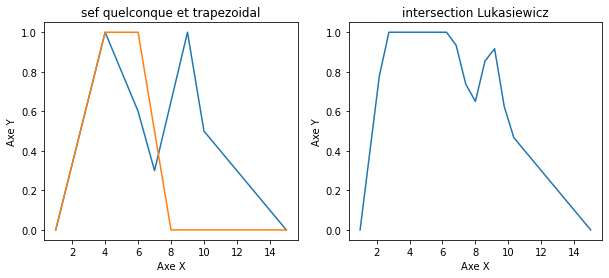

In [315]:
luka_co = Lukasiewicz_co()
union_l = union(1, 15, sef_quelconque, sef_trapezoidal, luka_co)
visualise2([[sef_quelconque, sef_trapezoidal], [union_l]], ["sef quelconque et trapezoidal", "intersection Lukasiewicz"])


#### A ∩ A_comp et A ∪  A_comp

On représente désormais le résultats de A ∩ A_comp pour des ensembles flous avec les t-normes Zadeh, Lukasiewicz et Probabiliste sur trois ensembles flous:

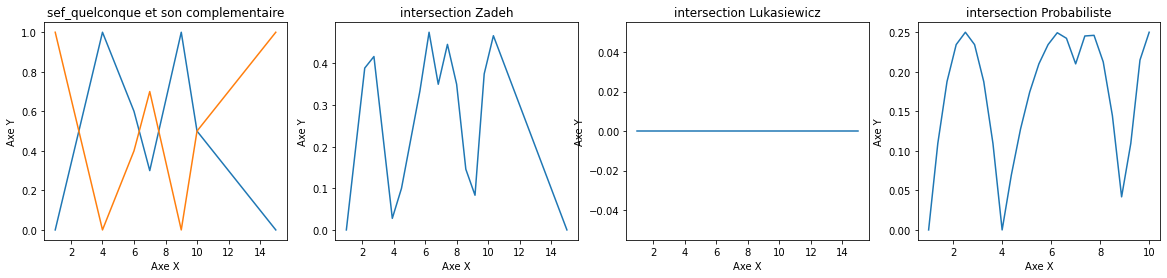

In [316]:
zadeh = Zadeh()
inter_z = intersection(1, 15, sef_quelconque, complementaire(sef_quelconque), zadeh)

luka = Lukasiewicz()
inter_l = intersection(1, 15, sef_quelconque, complementaire(sef_quelconque), luka)

proba = Probabiliste()
inter_p = intersection(1, 10, sef_quelconque, complementaire(sef_quelconque), proba)

visualise2([[sef_quelconque, complementaire(sef_quelconque)], [inter_z], [inter_l], [inter_p]],  ["sef_quelconque et son complementaire", "intersection Zadeh", "intersection Lukasiewicz", "intersection Probabiliste"])


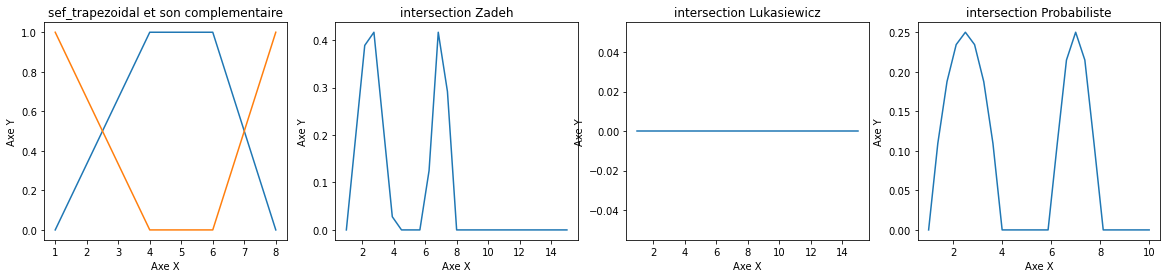

In [317]:
zadeh = Zadeh()
inter_z = intersection(1, 15, sef_trapezoidal, complementaire(sef_trapezoidal), zadeh)

luka = Lukasiewicz()
inter_l = intersection(1, 15, sef_trapezoidal, complementaire(sef_trapezoidal), luka)

proba = Probabiliste()
inter_p = intersection(1, 10, sef_trapezoidal, complementaire(sef_trapezoidal), proba)

visualise2([[sef_trapezoidal, complementaire(sef_trapezoidal)], [inter_z], [inter_l], [inter_p]],  ["sef_trapezoidal et son complementaire", "intersection Zadeh", "intersection Lukasiewicz", "intersection Probabiliste"])



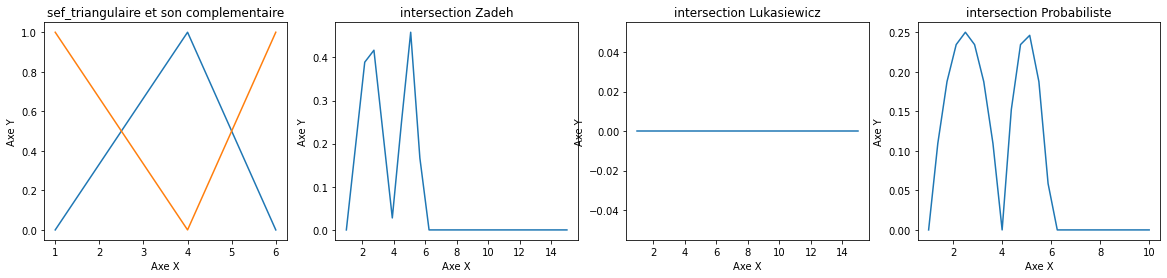

In [318]:
zadeh = Zadeh()
inter_z = intersection(1, 15, sef_triangulaire, complementaire(sef_triangulaire), zadeh)

luka = Lukasiewicz()
inter_l = intersection(1, 15, sef_triangulaire, complementaire(sef_triangulaire), luka)

proba = Probabiliste()
inter_p = intersection(1, 10, sef_triangulaire, complementaire(sef_triangulaire), proba)

visualise2([[sef_triangulaire, complementaire(sef_triangulaire)], [inter_z], [inter_l], [inter_p]],  ["sef_triangulaire et son complementaire", "intersection Zadeh", "intersection Lukasiewicz", "intersection Probabiliste"])

On représente désormais le résultats de A ∪ A_comp pour des ensembles flous avec les t-conormes Zadeh, Lukasiewicz et Probabiliste sur trois ensembles flous:

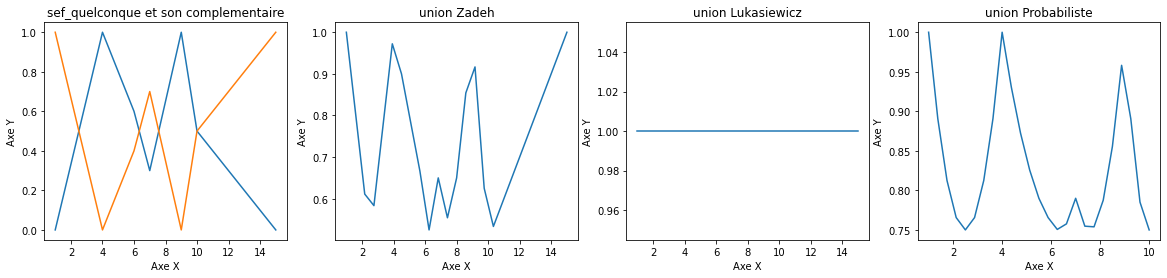

In [319]:
zadeh_co = Zadeh_co()
inter_z = union(1, 15, sef_quelconque, complementaire(sef_quelconque), zadeh_co)

luka_co = Lukasiewicz_co()
inter_l = union(1, 15, sef_quelconque, complementaire(sef_quelconque), luka_co)

proba_co = Probabiliste_co()
inter_p = union(1, 10, sef_quelconque, complementaire(sef_quelconque), proba_co)

visualise2([[sef_quelconque, complementaire(sef_quelconque)], [inter_z], [inter_l], [inter_p]],  ["sef_quelconque et son complementaire", "union Zadeh", "union Lukasiewicz", "union Probabiliste"])


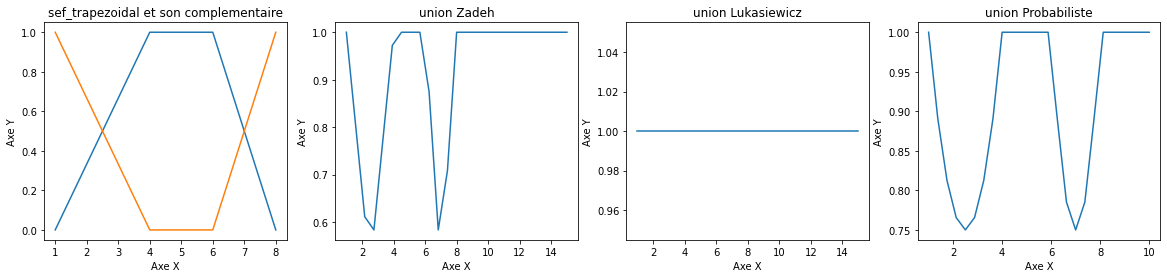

In [320]:
zadeh_co = Zadeh_co()
inter_z = union(1, 15, sef_trapezoidal, complementaire(sef_trapezoidal), zadeh_co)

luka_co = Lukasiewicz_co()
inter_l = union(1, 15, sef_trapezoidal, complementaire(sef_trapezoidal), luka_co)

proba_co = Probabiliste_co()
inter_p = union(1, 10, sef_trapezoidal, complementaire(sef_trapezoidal), proba_co)

visualise2([[sef_trapezoidal, complementaire(sef_trapezoidal)], [inter_z], [inter_l], [inter_p]],  ["sef_trapezoidal et son complementaire", "union Zadeh", "union Lukasiewicz", "union Probabiliste"])



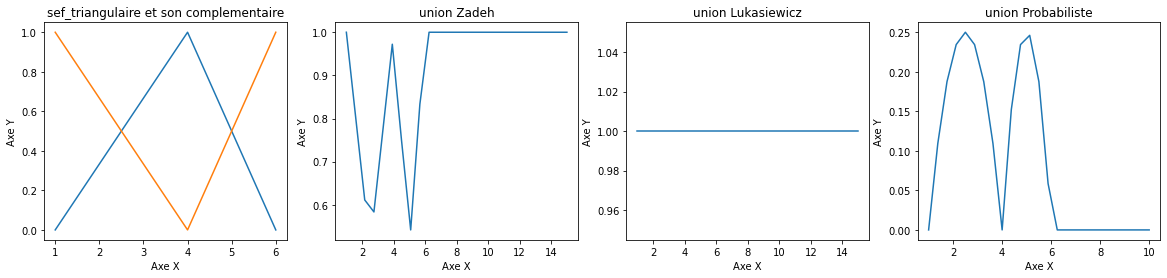

In [321]:
zadeh_co = Zadeh_co()
inter_z = union(1, 15, sef_triangulaire, complementaire(sef_triangulaire), zadeh_co)

luka_co = Lukasiewicz_co()
inter_l = union(1, 15, sef_triangulaire, complementaire(sef_triangulaire), luka_co)

proba_co = Probabiliste()
inter_p = union(1, 10, sef_triangulaire, complementaire(sef_triangulaire), proba_co)

visualise2([[sef_triangulaire, complementaire(sef_triangulaire)], [inter_z], [inter_l], [inter_p]],  ["sef_triangulaire et son complementaire", "union Zadeh", "union Lukasiewicz", "union Probabiliste"])


## Principe d'extension

In [322]:
class phi():
    def __init__(self, f, f_1):
        self._f = f
        self._f_1 = f_1
        
    def calcule(self, x):
        return self._f(x)

    def antecedant(self, y):
        return self._f_1(y)



On considère la fonction carrée (qui est surjective) puis la fonction cube (qui est bijective) pour l'extension. 

In [323]:
carree = lambda x: x ** 2
racine = lambda y: [-np.sqrt(y), np.sqrt(y)] if y>0 else [] if y<0 else [0]

phi_carree = phi(carree, racine)

print(phi_carree.calcule(3))
print(phi_carree.antecedant(4))
print(phi_carree.antecedant(-4))
print(phi_carree.antecedant(0))

9
[-2.0, 2.0]
[]
[0]


In [324]:
cube = lambda x: x**3
racine_cubique = lambda y: [y ** (1/3)]

phi_cube= phi(cube, racine_cubique)

print(phi_cube.calcule(2))
print(phi_cube.antecedant(8))

8
[2.0]


In [325]:
def calcul_pente(pt1, pt2):
    x1,y1 = pt1
    x2,y2 = pt2
    a = (y2-y1)/(x2-x1)
    b = y1-a*x1
    return a,b 

In [326]:
def extension(A, phi):

    A_bis = []
    res = []

    for i in range(len(A)-1):
        a,b = calcul_pente(A[i], A[i+1])
        interval = np.linspace(A[i][0], A[i+1][0], 100)
        list_xy = [(x,a*x+b) for x in interval]
        A_bis += list_xy
        
        y = [phi.calcule(x1) for x1,_ in list_xy]

        res += [(yi, a * max(phi.antecedant(yi)) + b) if phi.antecedant(yi)!=[] else (yi, 0) for yi in y]


    A_bis.append(A[-1])
    res.append((y[-1], 0))
    
    return res

On calcule ensuite l'image flou d'un sef A par les fonction carrée puis cube : 

<module 'matplotlib.pyplot' from '/usr/lib/python3/dist-packages/matplotlib/pyplot.py'>

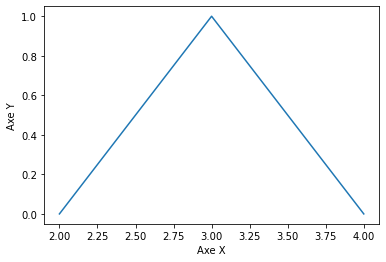

In [327]:
sef_test = [(2,0), (3, 1), (4,0)]
visualise([sef_test])


<module 'matplotlib.pyplot' from '/usr/lib/python3/dist-packages/matplotlib/pyplot.py'>

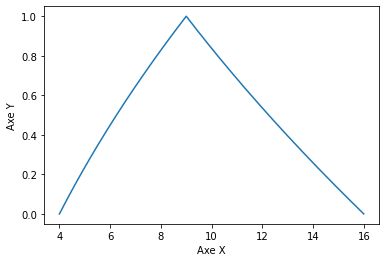

In [328]:
ext_carree = extension(sef_test, phi_carree)
visualise([ext_carree])

<module 'matplotlib.pyplot' from '/usr/lib/python3/dist-packages/matplotlib/pyplot.py'>

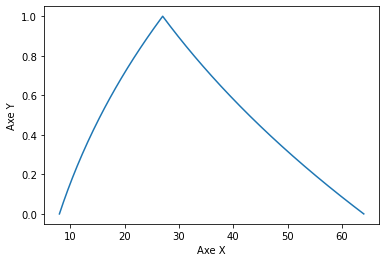

In [329]:
ext_cube = extension(sef_test, phi_cube)
visualise([ext_cube])

## Opérations logiques

In [330]:
def F_Lukasiewich():
    return lambda u,v: min(1-u+v, 1)

def F_Reichenbach():
    return lambda u,v: 1-u+u*v

def F_Kleene_Dienes():
    return lambda u,v : max(1-u,v)

def F_Brouwer_Godel():
    return lambda u,v: 1 if u<=v else v

def F_Goguen():
    return lambda u,v: min(v/u,1) if u!=0 else 1


def F_Willmott():
    return lambda u,v: max(1-u, min(u,v))

def F_Rescher_Gaines():
    return lambda u,v: 1 if u<=v else 0

def F_Mamdani():
    return lambda u,v: min(u,v)


def F_Larsen():
    return lambda u,v: u*v




In [331]:
def implication_floue_x0(A, B, x0, F):
    fA_x = deg_app(x0, A)
    y = np.linspace(B[0][0]-0.5, B[-1][0]+0.5, 10000)
    fB_y = [deg_app(yi, B) for yi in y]
    fR = [F(fA_x, fB_yi) for fB_yi in fB_y]
    return fR, list(zip(y,fR))

In [332]:
A = [(1,0),(2,1),(4,0)]
B = [(3,0), (5,1), (6,0)]
liste_F = [F_Lukasiewich(), 
           F_Reichenbach(), 
           F_Kleene_Dienes(),
           F_Brouwer_Godel(),
           F_Goguen(), 
           F_Willmott(),
           F_Rescher_Gaines(),
           F_Mamdani(),
           F_Larsen()]
titres = ["F_Lukasiewich","F_Reichenbach", "F_Kleene_Dienes", "F_Brouwer_Godel" , "F_Goguen", "F_Willmott", "F_Rescher_Gaines", "F_Mamdani","F_Larsen"] 

##### Cas où la prémisse vaut : fA(x0) = 0.25

<module 'matplotlib.pyplot' from '/usr/lib/python3/dist-packages/matplotlib/pyplot.py'>

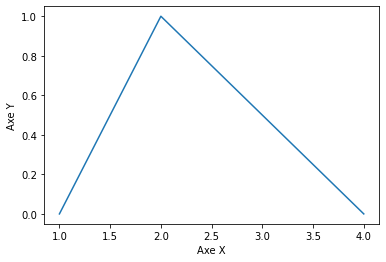

In [333]:
visualise([A])

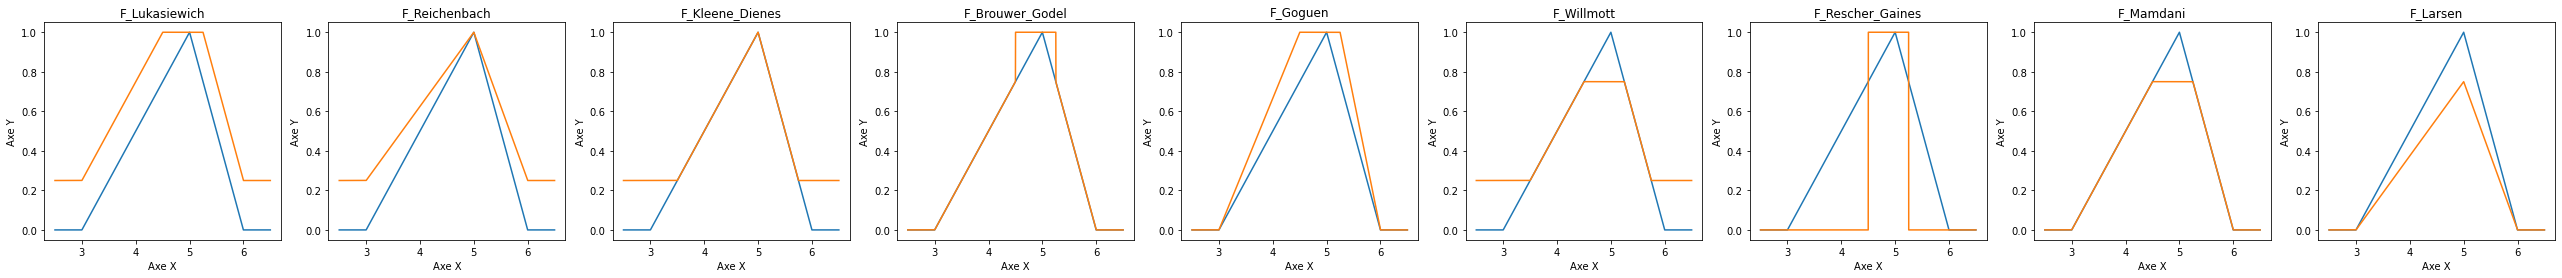

In [334]:
x0 = 2.5
liste_fR = []
for F in liste_F:
    _,fR = implication_floue_x0(A, B, x0, F)
    liste_fR.append([B,fR])
visualise2( liste_fR, titres)



##### Cas où la prémisse vaut : fA(x0) = 0

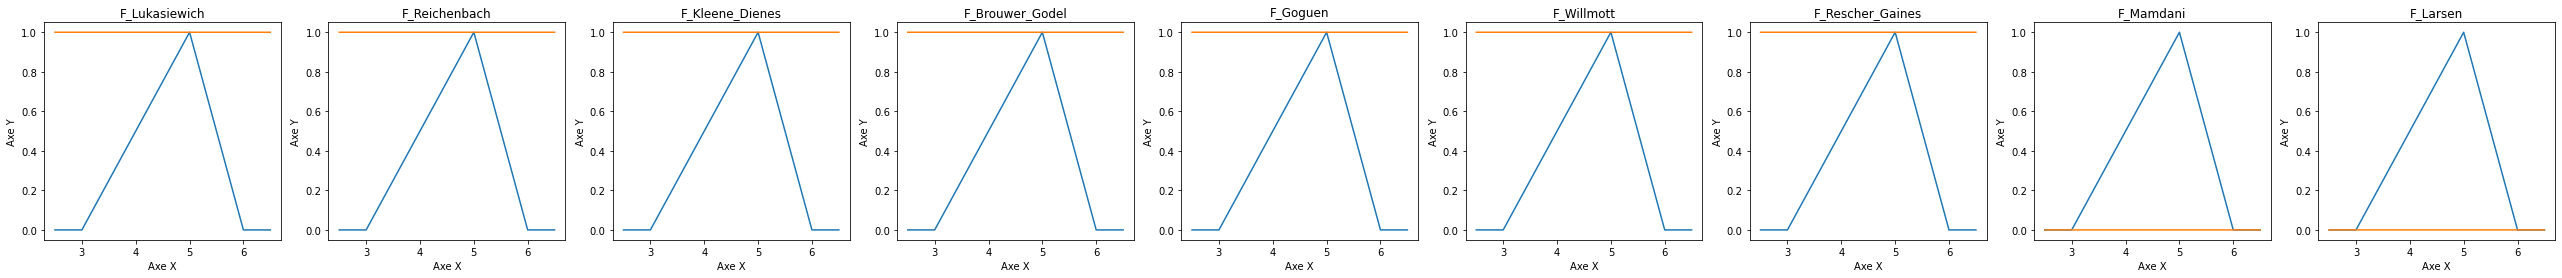

In [335]:
x0 = 6
liste_fR = []
for F in liste_F:
    _,fR = implication_floue_x0(A, B, x0, F)
    liste_fR.append([B,fR])
visualise2( liste_fR, titres)

##### Cas où la prémisse vaut : fA(x0) = 1

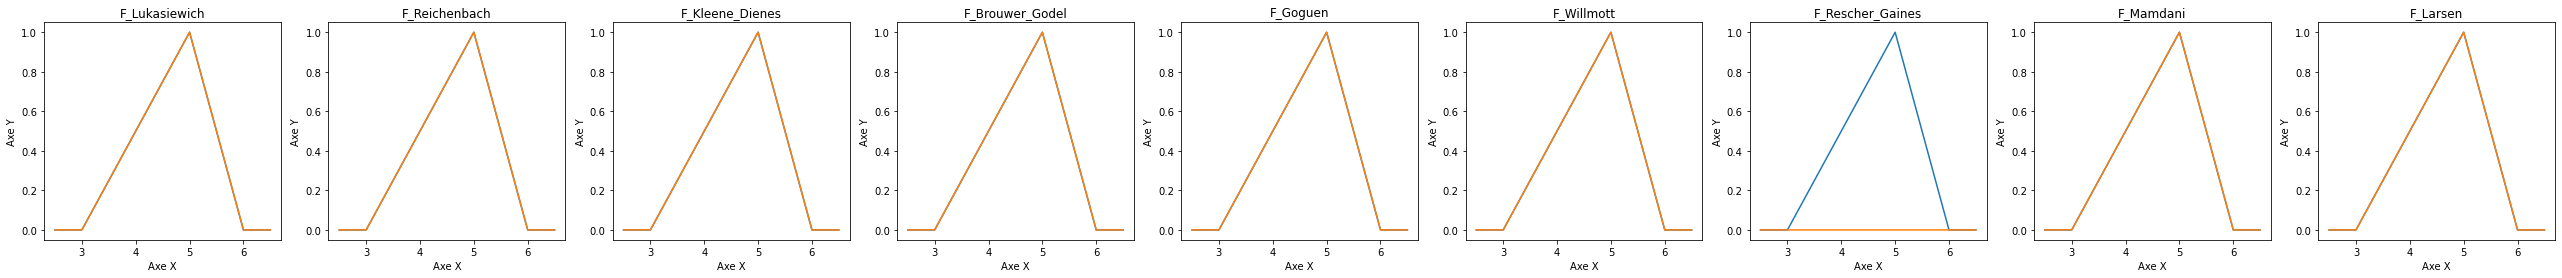

In [336]:
x0 = 2
liste_fR = []
for F in liste_F:
    _,fR = implication_floue_x0(A, B, x0, F)
    liste_fR.append([B,fR])
visualise2( liste_fR, titres)

In [376]:
def MPG(A, B, A_prim, F, t_norme): 
    Y = np.linspace(B[0][0]-0.5, B[-1][0]+0.5, 300)
    X = np.linspace(A_prim[0][0]-0.5, A_prim[-1][0]+0.5, 100) 
    liste_fAprim = [deg_app(x,A_prim) for x in X]
    liste_fA = [deg_app(x,A) for x in X]

    for yi in Y:
        liste_sup = [0 for _ in range(len(Y))]
        for i,xi in enumerate(X) : 
            
            fAprim_x = liste_fAprim[i]
            fA_x = liste_fA[i]
            fB_y = [deg_app(yi, B) for yi in Y]
            fR = [F(fA_x, fB_yi) for fB_yi in fB_y]

            liste_tnormes = [t_norme.compute(fAprim_x, fR_i) for fR_i in fR]
            for i in range(len(liste_sup)):
                liste_sup[i] = max(liste_sup[i], liste_tnormes[i])
                            
    return list(zip(Y,liste_sup))
    

In [377]:
A = [(1,0),(2,1),(4,0)]
B = [(3,0), (5,1), (6,0)]
t_norme_luka = Lukasiewicz()

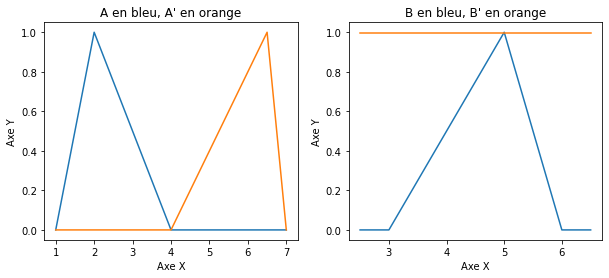

In [378]:
A_prim = [(4,0), (6.5,1), (7,0)]
B_prim = MPG(A, B, A_prim, F_Lukasiewich(), t_norme_luka)
visualise2([[A,A_prim],[B,B_prim]], ["A en bleu, A' en orange", "B en bleu, B' en orange"])

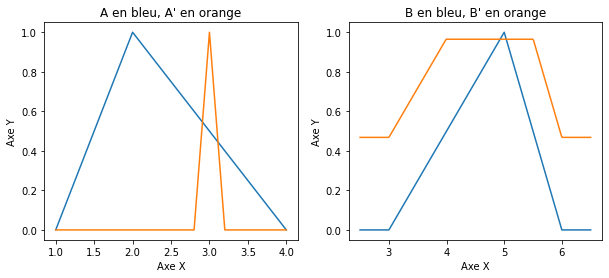

In [379]:
A_prim = [(2.8,0), (3,1), (3.2,0)]
B_prim = MPG(A, B, A_prim, F_Lukasiewich(), t_norme_luka)
visualise2([[A,A_prim],[B,B_prim]], ["A en bleu, A' en orange", "B en bleu, B' en orange"])

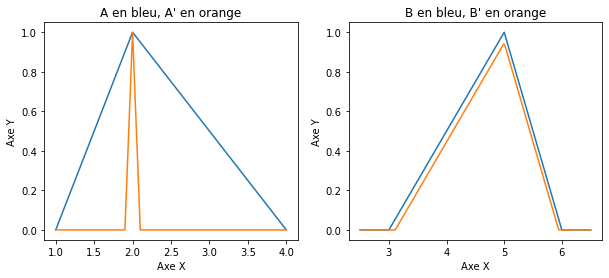

In [380]:
A_prim = [(1.9,0), (2,1), (2.1,0)]
B_prim = MPG(A, B, A_prim, F_Lukasiewich(), t_norme_luka)
visualise2([[A,A_prim],[B,B_prim]], ["A en bleu, A' en orange", "B en bleu, B' en orange"])

# Exercices de TD

### Exerice 2 : saké

<pre style="font-size: 14px;">
<u>Question 1 :</u>   

On utilise l'implication floue de Kleene-Deenes. Il faut donc utiliser l'opérateur de modus ponens Lukasiewich.
</pre>

<pre style="font-size: 14px;">
<u>Question 2 :</u>

Dans ce cas de figure, f_A'(x) = 1 si x=x0 et 0 sinon.  
Ainsi, f_B'(y) = max(1-f_A(x0), f_B(y)). 
<pre>

In [381]:
np.random.seed(42)

<pre style="font-size: 14px;">
<u>Question 3 :</u>

R1 : Si le saké est froid alors Hiya (on notera Hiya = 1)  
F1 : Le saké est à exactement 13° 
  
Dans ce cas, f_A'(x) est nul partout sauf en x0=13 où il vaut 1.   

Or, d'après la proprété de l'élément neutre des T-conormes T_conorme(x, 1) = x, on aura donc :   
f_B'(y) = sup_x ( T_Luka( f_A'(x), op->KD(f_A(x), f_B(y)) ) )  
        = T_Luka( f_A'(x0), op->KD(f_A(x0), f_B(y)) )   
        = T_Luka( 1, op->KD(f_A(x0), f_B(y)) )   
        = op->KD(f_A(x0), fB(y))  
  
Ici, on a donc f_B'(y) = max(1-f_A(13), f_B(y)) = max(1-0.67, f_B(y)) = max(0.33, f_B(y))  
  
On doit donc avoir f_B'(y) qui vaut 0.33 partout sauf en 1 où il vaut 1. 

Pour des question de représentation, nous avons représenté B par un sef étant un pic en 1 et non par un seul point :   
B = [(0.99,0),(1,1),(1.01,0)].  
Nous avons fait de même pour l'ensemble A' :   
A_prim = [(x0-0.1,0),(x0,1),(x0+0.1,0)]
</pre>


In [382]:
x0 = 13
A = [(8,0), (10,1), (12,1), (15,0)]
A_prim = [(x0-0.1,0),(x0,1),(x0+0.1,0)]
B = [(0.99,0),(1,1),(1.01,0)]
F = F_Kleene_Dienes()
t_norme_luka = Lukasiewicz()

In [383]:
_,fR = implication_floue_x0(A, B, x0, F)

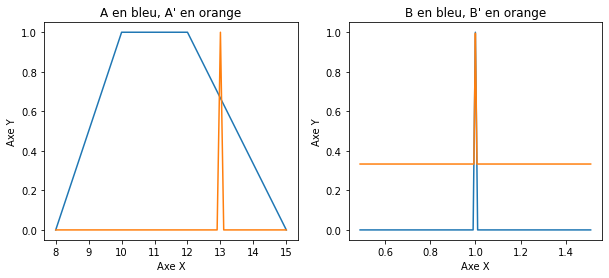

In [384]:
visualise2([[A,A_prim], [B,fR]], ["A en bleu, A' en orange", "B en bleu, B' en orange"])

<pre style="font-size: 14px;"> 
<u>Question 4 :</u>   

R1 : Si le saké est froid alors Hiya (on notera Hiya = 1)  
F2 : Le saké est à environ 49.5°  
  
Ici, A_prim = [(47.5,0),(49.5,1),(51.5,0)]

Par conséquent, f_B'(y) = sup_x ( T_Luka( f_A'(x), op->KD(f_A(x), f_B(y)) ) )

Dans ce cas précis, F2 sont incompatible avec la rèfle R1 (donc A et A' n'ont pas d'intersection commune), donc tout est possible : f_B'(y) = 1. 
</u>


In [385]:
A = [(8,0), (10,1), (12,1), (15,0)]
A_prim = [(47.5,0),(49.5,1),(51.5,0)]
B = [(0.95,0),(1,1),(1.05,0)]
F = F_Kleene_Dienes()
t_norme_luka = Lukasiewicz()

In [386]:
B_prim = MPG(A, B, A_prim, F, t_norme_luka)

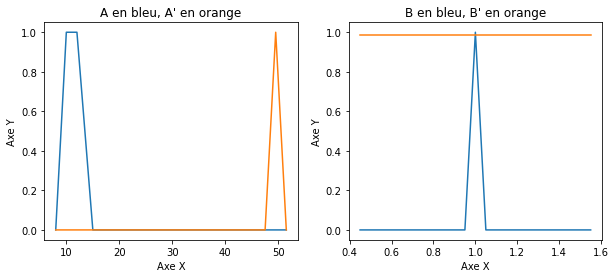

In [387]:
visualise2([[A,A_prim],[B,B_prim]], ["A en bleu, A' en orange", "B en bleu, B' en orange"])

<pre style="font-size: 14px;">
<u>Question 5 :</u>   

R2 : Si le saké est a environ 50° alors Atsukan (on notera Atsukan = 2)  
F1 : Le saké est à exactement 13°  

Dans ce cas, f_A'(x) est nul partout sauf en x0=13 où il vaut 1.   

Or, d'après la proprété de l'élément neutre des T-conormes T_conorme(x, 1) = x, on aura donc :   
f_B'(y) = sup_x ( T_Luka( f_A'(x), op->KD(f_A(x), f_B(y)) ) )  
        = T_Luka( f_A'(x0), op->KD(f_A(x0), f_B(y)) )   
        = T_Luka( 1, op->KD(f_A(x0), f_B(y)) )   
        = op->KD(f_A(x0), fB(y))  
        = op->KD(0, fB(y))
        = max(1-0, fB(y))
        = 1
</pre>

In [388]:
A = [(48,0), (50,1), (52,0)]
x0=13
A_prim = [(x0-0.01,0),(x0,1),(x0+0.01,0)]
B = [(1.99,0),(2,1),(2.01,0)]
F = F_Kleene_Dienes()
t_norme_luka = Lukasiewicz()

In [389]:
_,fR = implication_floue_x0(A, B, x0, F)

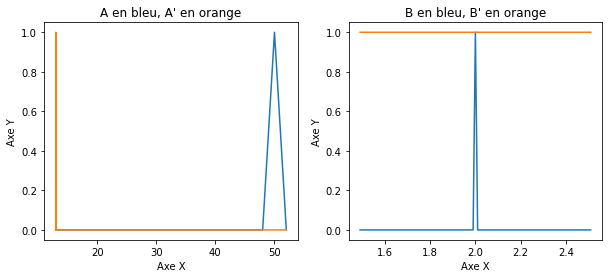

In [390]:
visualise2([[A,A_prim], [B,fR]], ["A en bleu, A' en orange", "B en bleu, B' en orange"])

### Exercice 3 : Retard

Dans cet exercice, on notera arrivée à l'heure (h) par 1 et le retard (r) par 2.

<pre style="font-size: 14px;">
<u>Question 1 :</u>

On note x0 la durée du trajet.   
f_A'(x) = 1 si x=x0   
f_A'(x) = 0 sinon  
   
Ainsi : 
f_B'(y) = sup_x ( T_Luka( f_A'(x), op->G(f_A(x), f_B(y)) ) )  
        = T_Luka( f_A'(x0), op->G(f_A(x0), f_B(y)) )   
        = T_Luka( 1, op->G(f_A(x0), f_B(y)) )   
        = op->G(f_A(x0), fB(y))  
         | min(fB(y)/f_A(x0), 1) si u!=0
        =|
         | 1 sinon
</pre>


<pre style="font-size: 14px;">
<u>Question 2 : </u>  

On note x0 la durée du trajet.   
f_A'(x) = 1 si x=x0   
f_A'(x) = 0 sinon  
   
Ainsi : 
f_B'(y) = sup_x ( T_Luka( f_A'(x), op->G(f_A(x), f_B(y)) ) )  
        = T_Luka( f_A'(x0), op->G(f_A(x0), f_B(y)) )   
        = T_Luka( 1, op->G(f_A(x0), f_B(y)) )   
        = op->G(f_A(x0), fB(y))  
         | min(fB(y)/f_A(x0), 1) si u!=0
        =|
         | 1 sinon
</pre>
 

<pre style="font-size: 14px;">
<u>Question 3 :</u>

R1 : Si la durée du trajet est courte alors arrivée à l'heure.  
F1 : La durée du trajet est de 11min.
  
Dans ce cas, f_A'(x) est nul partout sauf en x0=11 où il vaut 1.   

Or, d'après la proprété de l'élément neutre des T-conormes T_conorme(x, 1) = x, on aura donc :   
f_B'(y) = sup_x ( T_Luka( f_A'(x), op->G(f_A(x), f_B(y)) ) )  
        = T_Luka( f_A'(x0), op->G(f_A(x0), f_B(y)) )   
        = T_Luka( 1, op->G(f_A(x0), f_B(y)) )   
        = op->G(f_A(x0), fB(y))  
        = min(fB(y)/f_A(x0), 1)    car f_A(x0) = f_A(11) = 0.5
        = min(fB(y)/0.5, 1)
        
         | min(0/0.5, 1) si y!=1 
        =|
         | min(1/0.5, 1) si y=1
         
         | 0 si y!=1 (pas à l'heure)
        =|
         | 1 sinon 
  
On doit donc avoir f_B'(y) qui vaut 0 partout sauf en 1 où il vaut 1. 
</pre>

In [391]:
A = [(8,0), (10,1), (12,0)]
x0=11
A_prim = [(x0-0.01,0),(x0,1),(x0+0.01,0)]
B = [(0.99,0),(1,1),(1.01,0)]
F = F_Goguen()
t_norme_luka = Lukasiewicz()

In [392]:
_,fR = implication_floue_x0(A, B, x0, F)

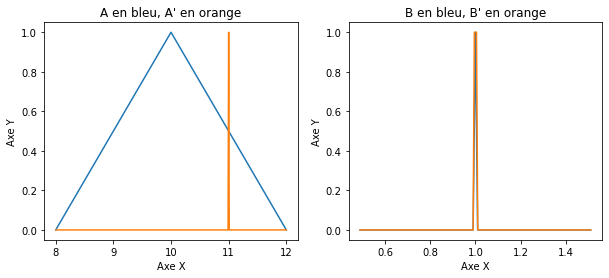

In [393]:
visualise2([[A,A_prim],[B,fR]], ["A en bleu, A' en orange", "B en bleu, B' en orange"])

<pre style="font-size: 14px;">
<u>Question 3 (bis):</u> 

R2 : Si la durée du trajet est normale alors arrivée à l'heure avec une certitude 0.75.  
F1 : La durée du trajet est de 11min.
  
Dans ce cas, f_A'(x) est nul partout sauf en x0=11 où il vaut 1.   

Or, d'après la proprété de l'élément neutre des T-conormes T_conorme(x, 1) = x, on aura donc :   
f_B'(y) = sup_x ( T_Luka( f_A'(x), op->G(f_A(x), f_B(y)) ) )  
        = T_Luka( f_A'(x0), op->G(f_A(x0), f_B(y)) )   
        = T_Luka( 1, op->G(f_A(x0), f_B(y)) )   
        = op->G(f_A(x0), fB(y))  
        = min(fB(y)/f_A(x0), 1)    car f_A(x0) = f_A(11) = 0.5
        = min(fB(y)/0.5, 1)

         | min(0/0.5, 1) si y!=1 
        =|
         | min(0.75/0.5, 1) si y=1
  
         | 0 si y!=1 (pas à l'heure)
        =|
         | 1 sinon 
  
On doit donc avoir f_B'(y) qui vaut 0 partout sauf en 1 où il vaut 1. 
</pre>

In [394]:
A = [(10,0), (15,1), (16,1), (18,0)]
x0=11
A_prim = [(x0-0.01,0),(x0,1),(x0+0.01,0)]
B = [(0.99,0),(1,0.75),(1.01,0)]
F = F_Goguen()
t_norme_luka = Lukasiewicz()


In [395]:
_,fR = implication_floue_x0(A, B, x0, F)

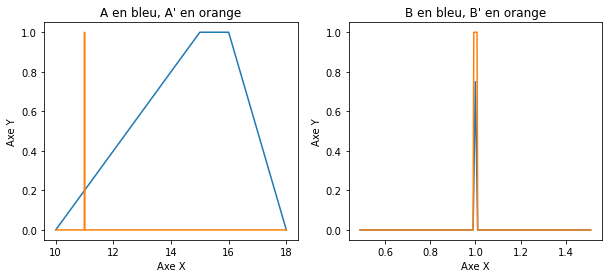

In [396]:
visualise2([[A,A_prim],[B,fR]], ["A en bleu, A' en orange", "B en bleu, B' en orange"])

<pre style="font-size: 14px;">
<u>Question 4:</u> 

R2 : Si la durée du trajet est normale alors arrivée à l'heure avec une certitude 0.75.  
F1 : La durée du trajet est de 14min avec une certitude de 0.8.
  
Dans ce cas, f_A'(x) est nul partout sauf en x0=14 où il vaut 0.8.   

On aura donc :   
f_B'(y) = sup_x ( T_Luka( f_A'(x), op->G(f_A(x), f_B(y)) ) )  
        = T_Luka( f_A'(x0), op->G(f_A(x0), f_B(y)) )          car si x!=x0 alors f_A'=0
        = T_Luka( 0.8, op->G(f_A(x0), f_B(y)) )   

         | T_Luka( 0.8, op->G(0.8, 0.75) )    si y=1
        =|
         | T_Luka( 0.8, op->G(0.8, 0) )   si y!=1

         | T_Luka( 0.8, min(0.75/0.8, 1))    si y=1
        =|
         | T_Luka( 0.8, min(0/0.8, 1) )   si y!=1

         | T_Luka( 0.8, 0.9375)    si y=1
        =|
         | T_Luka( 0.8, 0)   si y!=1

         | max(0.7375, 0)    si y=1
        =|
         | max(-0.2, 0)  si y!=1

         | 0.7375    si y=1
        =|
         | 0  si y!=1
  
On doit donc avoir f_B'(y) qui vaut 0 partout sauf en 1 où il vaut 0.7375. 
</pre>

In [426]:
A = [(10,0), (15,1), (16,1), (18,0)]
x0=14
A_prim = [(x0-0.1,0),(x0,0.8),(x0+0.1,0)]
B = [(0.99,0),(1,0.75),(1.01,0)]
F = F_Goguen()
t_norme_luka = Lukasiewicz()


In [427]:
B_prim = MPG(A, B, A_prim, F, t_norme_luka)

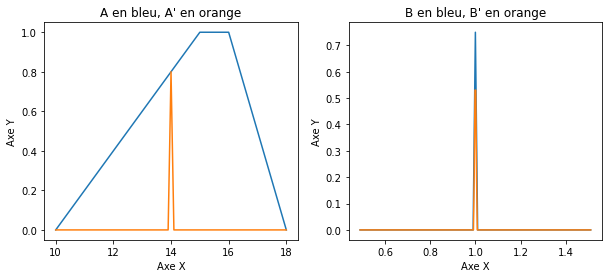

In [428]:
visualise2([[A,A_prim],[B,B_prim]], ["A en bleu, A' en orange", "B en bleu, B' en orange"])

Nota Bene : En raison de la discrétisation utilisée nous n'obtenons pas necessairement le point y=1. Donc, nous ne calculons pas non plus f_B'(1) ce qui explique que le sef de B' n'atteigne pas 0.7375 pour f_B'(1).

### Exercice 4 : Note

<pre style="font-size: 14px;">
<u>Question 1 :</u>   

On utilise l'implication floue de Kleene-Deenes. Il faut donc utiliser l'opérateur de modus ponens Lukasiewich.
</pre>

<pre style="font-size: 14px;">
<u>Question 2 :</u>   

R1 : Si la note obtenue est bonne, alots la candidature est envisageable.


Tout d'abord, en considérant cette règle, on peut représenter Clodomir par sa note x0 = 13.
Dans ce cas, f_A'(x) est nul partout sauf en x0=13 où il vaut 1.   

Or, d'après la proprété de l'élément neutre des T-conormes T_conorme(x, 1) = x, on aura donc :   
f_B'(y) = sup_x ( T_Luka( f_A'(x), op->KD(f_A(x), f_B(y)) ) )  
        = T_Luka( f_A'(x0), op->KD(f_A(x0), f_B(y)) ) 
        = T_Luka( 1, op->KD(f_A(x0), f_B(y)) )
        = op->KD(f_A(x0), f_B(y))
        = max( 1-f_A(x0), f_B(y))
        = max(1-0.5, f_B(y))
        = max(O.5, f_B(y))

Donc, f_B'(y) vaut 1 si y=1 et 0.5 sinon.


</pre>

In [457]:
x0 = 13
A = [(12,0), (14,1), (17,1), (20,0)]
A_prim = [(x0-0.1,0),(x0,0.8),(x0+0.1,0)]
B = [(0.99,0),(1,1),(1.01,0)]
F = F_Kleene_Dienes()
t_norme_luka = Lukasiewicz()

In [435]:
_,fR = implication_floue_x0(A, B, x0, F)

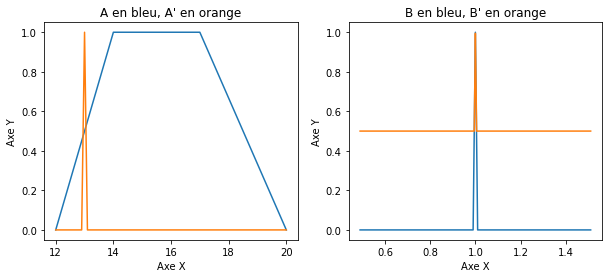

In [436]:
visualise2([[A,A_prim],[B,fR]], ["A en bleu, A' en orange", "B en bleu, B' en orange"])